#Monte-Carlo (MC) Dropout

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 28s 12ms/step - loss: 0.3450 - accuracy: 0.8979 - val_loss: 0.1477 - val_accuracy: 0.9574 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1783 - accuracy: 0.9466 - val_loss: 0.1111 - val_accuracy: 0.9671 - lr: 9.5000e-04
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1432 - accuracy: 0.9561 - val_loss: 0.0878 - val_accuracy: 0.9732 - lr: 9.0250e-04
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1215 - accuracy: 0.9621 - val_loss: 0.0791 - val_accuracy: 0.9763 - lr: 8.5737e-04
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1066 - accuracy: 0.9667 - val_loss: 0.0788 - val_accuracy: 0.9759 - lr: 8.1451e-04
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1001 - accuracy: 0.9685 - val_loss: 0.0737 - val_ac

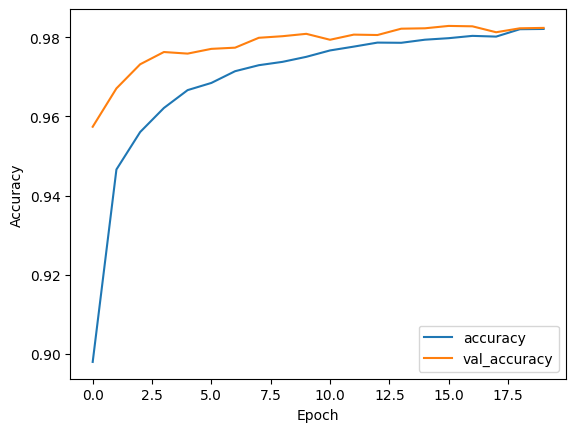

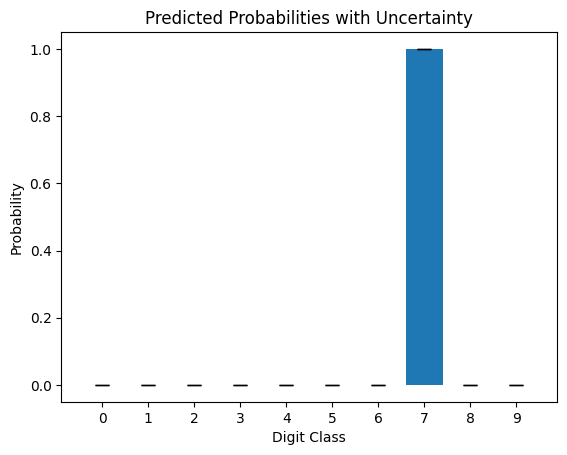

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers, callbacks
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define logistic regression model using Sequential API with MC Dropout
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten the 28x28 image to a vector
    layers.Dropout(0.2),                       # Dropout layer with 20% dropout rate
    layers.Dense(128, activation='relu'),      # Hidden layer with ReLU activation
    layers.Dropout(0.2),                       # Dropout layer with 20% dropout rate
    layers.Dense(10, activation='softmax')      # Output layer with 10 units (classes) and softmax activation
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define Learning Rate Scheduler callback
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)

# Define Early Stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with MC Dropout and callbacks
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Perform Monte Carlo Dropout inference for uncertainty estimation
def predict_with_uncertainty(model, images, n_samples=10):
    result = tf.stack([model(images, training=True) for _ in range(n_samples)])
    prediction = tf.math.reduce_mean(result, axis=0)
    uncertainty = tf.math.reduce_std(result, axis=0)
    return prediction, uncertainty

# Example: Make predictions with uncertainty estimation
sample_image = test_images[0:1]
predictions, uncertainties = predict_with_uncertainty(model, sample_image)

# Display predicted probabilities and uncertainties
plt.bar(range(10), predictions[0], yerr=uncertainties[0], capsize=5)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.title('Predicted Probabilities with Uncertainty')
plt.xlabel('Digit Class')
plt.ylabel('Probability')
plt.show()

#Max-Norm Regularization

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2921 - accuracy: 0.9149 - val_loss: 0.1316 - val_accuracy: 0.9608 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1440 - accuracy: 0.9570 - val_loss: 0.1047 - val_accuracy: 0.9678 - lr: 9.5000e-04
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1135 - accuracy: 0.9665 - val_loss: 0.0937 - val_accuracy: 0.9712 - lr: 9.0250e-04
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0962 - accuracy: 0.9703 - val_loss: 0.0817 - val_accuracy: 0.9741 - lr: 8.5737e-04
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.0768 - val_accuracy: 0.9771 - lr: 8.1451e-04
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0810 - accuracy: 0.9752 - val_loss: 0.0828 - val_accuracy: 0.9739 - lr: 7.7378e-04
Epoch 7/20
1875/1875 [==============

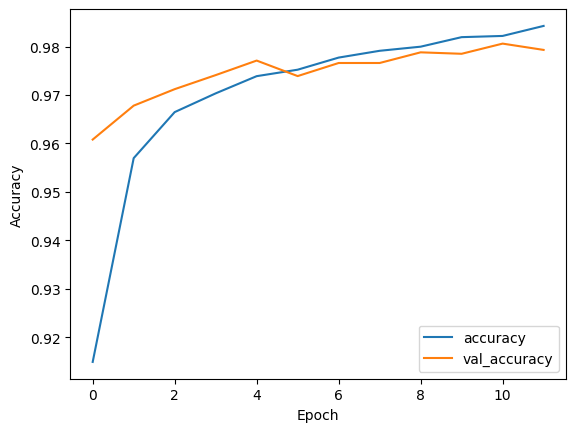

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers, callbacks, constraints
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define logistic regression model using Sequential API with Max-Norm Regularization
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),                      # Flatten the 28x28 image to a vector
    layers.Dense(128, activation='relu',
                 kernel_constraint=constraints.MaxNorm(max_value=2.0)),  # Hidden layer with ReLU activation and max-norm regularization
    layers.Dropout(0.2),                                       # Dropout layer with 20% dropout rate
    layers.Dense(10, activation='softmax')                      # Output layer with 10 units (classes) and softmax activation
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define Learning Rate Scheduler callback
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)

# Define Early Stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Summary and Practical Guidelines

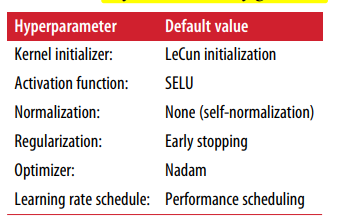

Epoch 1/5
1563/1563 [==============================] - 325s 206ms/step - loss: 1.5263 - accuracy: 0.4778 - val_loss: 1.4107 - val_accuracy: 0.5096 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 299s 191ms/step - loss: 1.1864 - accuracy: 0.5878 - val_loss: 1.1550 - val_accuracy: 0.5984 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 310s 199ms/step - loss: 1.1195 - accuracy: 0.6089 - val_loss: 0.9831 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 312s 200ms/step - loss: 1.0732 - accuracy: 0.6282 - val_loss: 0.9998 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 5/5
313/313 [==============================] - 18s 58ms/step - loss: 0.9455 - accuracy: 0.6874
Test accuracy: 0.6873999834060669


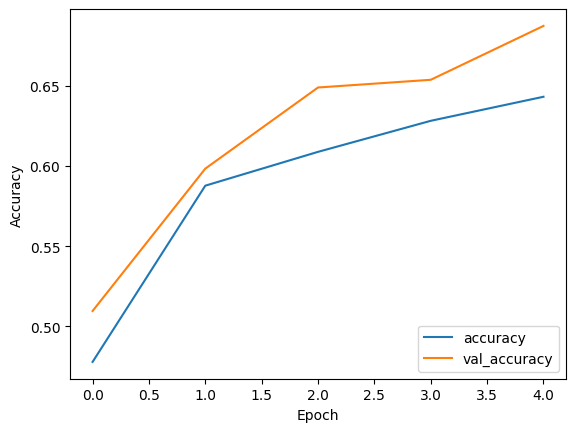

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, callbacks
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.initializers import LecunNormal
from tensorflow.keras.activations import selu
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define DNN model with LeCun initialization and SELU activation
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=selu, kernel_initializer=LecunNormal(), padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation=selu, kernel_initializer=LecunNormal(), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation=selu, kernel_initializer=LecunNormal(), padding='same'),
    layers.Conv2D(64, (3, 3), activation=selu, kernel_initializer=LecunNormal(), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation=selu, kernel_initializer=LecunNormal()),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer
optimizer = Nadam()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define Early Stopping callback to monitor validation loss and stop training if no improvement
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Define Performance Scheduling callback to adjust learning rate based on validation loss
performance_scheduler = callbacks.ReduceLROnPlateau(factor=0.5, patience=2)

# Train the model with Early Stopping and Performance Scheduling callbacks
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, performance_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history (accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


#Custom Models and Training with TensorFlow

#A Quick Tour of TensorFlow

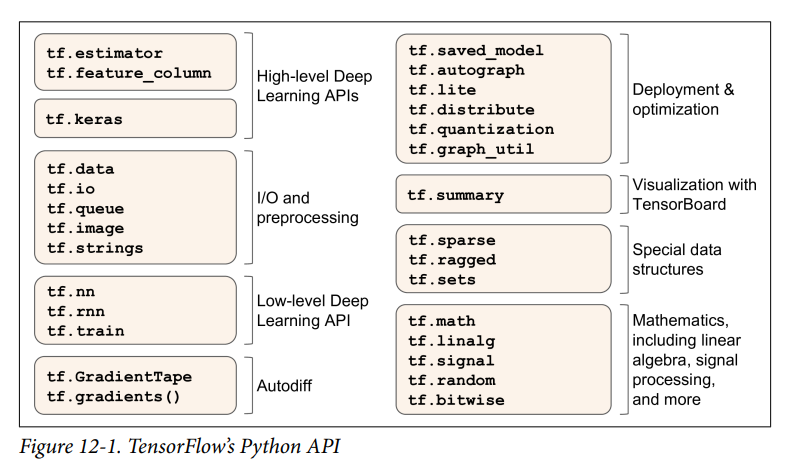

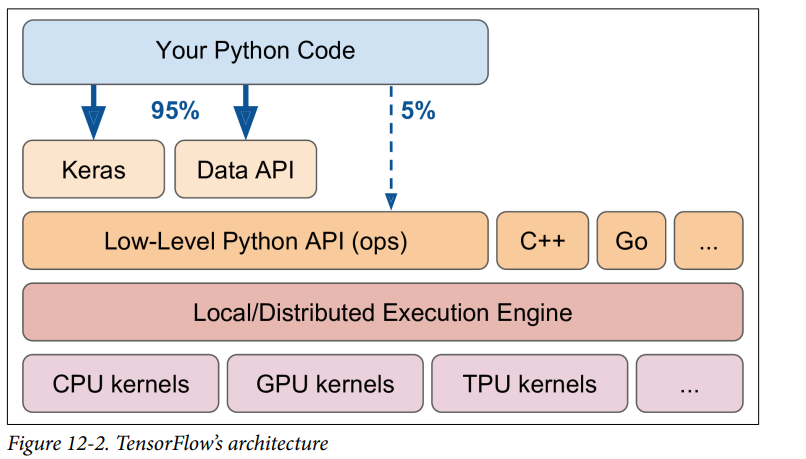

#Using TensorFlow like NumPy

#Tensors and Operations


In [ ]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [ ]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
t.shape

TensorShape([2, 3])

In [ ]:
t.dtype

tf.float32

In [ ]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [ ]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

#Tensors and NumPy

In [ ]:
import numpy as np
a = np.array([2., 4., 5.])

In [ ]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [ ]:
t.numpy() # or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [ ]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

#Type Conversions

In [ ]:
t2 = tf.constant(40., dtype=tf.float64)

In [ ]:
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

#Variables

In [ ]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [ ]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [ ]:
import tensorflow as tf

# Create a tensor
x = tf.constant([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0]])

# Reduction operations
sum_along_axis0 = tf.reduce_sum(x, axis=0)
sum_along_axis1 = tf.reduce_sum(x, axis=1)

mean_along_axis0 = tf.reduce_mean(x, axis=0)
mean_along_axis1 = tf.reduce_mean(x, axis=1)

min_along_axis0 = tf.reduce_min(x, axis=0)
max_along_axis1 = tf.reduce_max(x, axis=1)

all_elements_true = tf.reduce_all(x > 0)
any_true_along_axis1 = tf.reduce_any(x > 5, axis=1)

variance_along_axis0 = tf.math.reduce_variance(x, axis=0)
stddev_along_axis1 = tf.math.reduce_std(x, axis=1)

# Print results
print("Original Tensor:")
print(x.numpy())
print()

print("Reduce Sum along axis 0:")
print(sum_along_axis0.numpy())
print()

print("Reduce Sum along axis 1:")
print(sum_along_axis1.numpy())
print()

print("Reduce Mean along axis 0:")
print(mean_along_axis0.numpy())
print()

print("Reduce Mean along axis 1:")
print(mean_along_axis1.numpy())
print()

print("Reduce Min along axis 0:")
print(min_along_axis0.numpy())
print()

print("Reduce Max along axis 1:")
print(max_along_axis1.numpy())
print()

print("Reduce All (check if all elements are positive):")
print(all_elements_true.numpy())
print()

print("Reduce Any along axis 1 (check if any element > 5 along columns):")
print(any_true_along_axis1.numpy())
print()

print("Reduce Variance along axis 0:")
print(variance_along_axis0.numpy())
print()

print("Reduce Standard Deviation along axis 1:")
print(stddev_along_axis1.numpy())

Original Tensor:
[[1. 2. 3.]
 [4. 5. 6.]]

Reduce Sum along axis 0:
[5. 7. 9.]

Reduce Sum along axis 1:
[ 6. 15.]

Reduce Mean along axis 0:
[2.5 3.5 4.5]

Reduce Mean along axis 1:
[2. 5.]

Reduce Min along axis 0:
[1. 2. 3.]

Reduce Max along axis 1:
[3. 6.]

Reduce All (check if all elements are positive):
True

Reduce Any along axis 1 (check if any element > 5 along columns):
[False  True]

Reduce Variance along axis 0:
[2.25 2.25 2.25]

Reduce Standard Deviation along axis 1:
[0.8164966 0.8164966]


#Other Data Structures


In [ ]:
import tensorflow as tf

# 1. Sparse Tensor
dense_tensor = tf.constant([[1, 0, 0],
                            [0, 0, 2],
                            [0, 3, 0]])

sparse_tensor = tf.sparse.from_dense(dense_tensor)
print("Sparse Tensor:")
print(sparse_tensor)

# 2. Tensor Arrays
tensor_array = tf.TensorArray(tf.float32, size=3)

for i in range(3):
    tensor_array = tensor_array.write(i, tf.random.normal([2, 2]))

print("Tensor Array Elements:")
for i in range(3):
    print("Tensor at index", i, ":", tensor_array.read(i))

# 3. Ragged Tensor
ragged_tensor = tf.ragged.constant([[1, 2], [3, 4, 5], [6]])

print("Values of Ragged Tensor:")
for row in ragged_tensor:
    print(row)

# 4. String Tensor
string_tensor = tf.constant(["Hello", "TensorFlow", "World"])

print("String Tensor Elements:")
for s in string_tensor:
    print(s)

# 5. Boolean Tensor
bool_tensor = tf.constant([True, False, True])

print("Boolean Tensor Elements:")
for b in bool_tensor:
    print(b)

Sparse Tensor:
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]
 [2 1]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))
Tensor Array Elements:
Tensor at index 0 : tf.Tensor(
[[ 1.725734   -0.12114953]
 [-0.59932375 -0.9080081 ]], shape=(2, 2), dtype=float32)
Tensor at index 1 : tf.Tensor(
[[ 0.354333   0.5486679]
 [ 1.0621101 -0.8457475]], shape=(2, 2), dtype=float32)
Tensor at index 2 : tf.Tensor(
[[ 1.0265126  -0.07126333]
 [-0.61273503  1.0980635 ]], shape=(2, 2), dtype=float32)
Values of Ragged Tensor:
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6], shape=(1,), dtype=int32)
String Tensor Elements:
tf.Tensor(b'Hello', shape=(), dtype=string)
tf.Tensor(b'TensorFlow', shape=(), dtype=string)
tf.Tensor(b'World', shape=(), dtype=string)
Boolean Tensor Elements:
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(True